# Polynômes de Bernstein
On définit les polynômes de Bernstein de degré $n$, tels que pour tout $i \in [ 0,n ]$ : 
$B_{n,i}(t)=\begin{pmatrix} n \\ i \end{pmatrix} t^i \left(1-t\right)^{n-i}.$

De plus, on rappelle que les coefficiente binomiaux s'expriment ainsi :
$\begin{pmatrix} n \\ p \end{pmatrix} = \dfrac{n!}{p! (n-p)!} = \dfrac{n}{p} \times \begin{pmatrix} n-1 \\ p-1 \end{pmatrix}$.

!!! question Question 1
Implémenter la fonction `factorielle(n: int) -> int` permettant de calculer $n!  = \prod\limits_{1\leq i \leq n} i = 1\times 2 \times ... \times (n-1) \times n$.
!!!

In [1]:
def factorielle(n):
    res = 1
    j = 0
    while  j < n :
        j = j+1
        res = res*j
    return res

!!! question Question 2
Implémenter la fonction `binomial(n : int, p : int) -> int` permettant de calculer $\begin{pmatrix} n \\ p \end{pmatrix}$.
!!!

In [2]:
def binomial(n : int, p : int) -> int :
    return factorielle(n)//(factorielle(p)*factorielle(n-p))

!!! question Question 3
Implémenter la fonction `binomial_rec(n : int, p : int) -> int` permettant de calculer $\begin{pmatrix} n \\ p \end{pmatrix}$ de façon récursive. 
!!!

In [3]:
def binomial_rec(n : int, p : int) -> int :
    if p > n : 
        return 0
    if p == 0  or p == n : 
        return 1
    else : 
        return n * binomial_rec(n-1,p-1)//p

On définit les polynômes de Bernstein de degré $n$, tels que pour tout $i \in [ 0,n ]$ : 
$$B_{n,i}(t)=\begin{pmatrix} n \\ i \end{pmatrix} t^i \left(1-t\right)^{n-i}.$$

!!! question Question 4 
Implémenter la fonction `bernstein(n : int, i : int, t:float) -> float` permettant de calculer $B_{n,i}(t)$ pour $t\in [0,1]$.
!!!

??? tip Tests : 
- `bernstein(3,0,0),bernstein(3,1,0),bernstein(3,2,0),bernstein(3,3,0)` renvoie `(1, 0, 0, 0)`;
- `bernstein(3,0,.5),bernstein(3,1,.5),bernstein(3,2,.5),bernstein(3,3,.5)` renvoie `(0.125, 0.375, 0.375, 0.125)`;
- `bernstein(3,0,.5),bernstein(3,1,.5),bernstein(3,2,.5),bernstein(3,3,.5)` renvoie `(0,0,0,1)`.
???

In [4]:
def bernstein(n : int, i : int, t : float) -> float :
    return binomial(n,i)*t**i*(1-t)**(n-i)

# Courbes de Bézier

Soient $n+1$ points du plan $P_0(x_0,y_0)$, ..., $P_{n+1}(x_{n+1},y_{n+1})$ (appelés pôles). La courbe de Bézier est alors définie par : $M(t)=\sum\limits_{i=0}^n B_{n,i} P_i$ pour $t\in[0,1]$.

Utilisant couramment, les courbes de Bézier de degré $n=3$ (4 pôles), on a alors :
$$M(t)=\left(1-t \right)^3P_0  + 3t\left(1-t \right)^2P
_1 + 3t^2\left(1-t \right)P_2 + t^3P_3.$$
ou encore : 
$$\overrightarrow{OM}(t)=
\begin{pmatrix}
\left(1-t \right)^3x_0  + 3t\left(1-t \right)^2x
_1 + 3t^2\left(1-t \right)x_2 + t^3x_3 \\
\left(1-t \right)^3y_0  + 3t\left(1-t \right)^2y
_1 + 3t^2\left(1-t \right)y_2 + t^3y_3 \\
\end{pmatrix}.$$

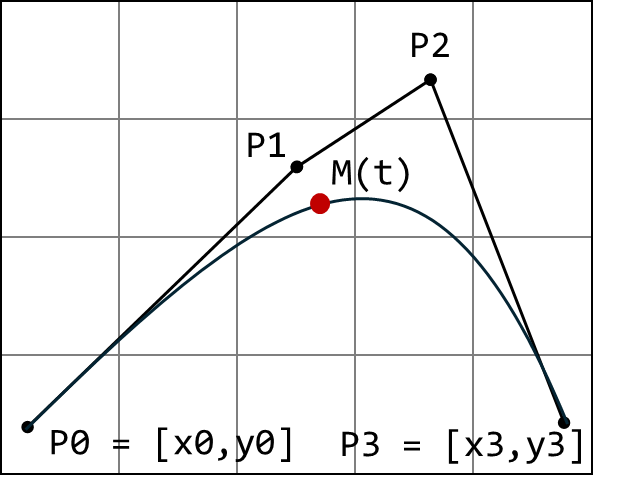

On précise que $M(0)=P_0$, $M(1)=P_3$, la tangente à $M(0)$ suit la direction $\overrightarrow{P_0 P_1}$ et la tangente à $M(1)$ suit la direction  $\overrightarrow{P_2 P_3}$.

On note :
- `P0`, `P1`, `P2`, `P3` : pôles de la courbe de Bézier définis par `P0 = [x0,y0]`, `P1 = [x1,y1]`, `P2 = [x2,y2]` et `P3 = [x3,y3]`;
- `les_t` : liste de `n` valeurs floattantes équi-réparties entre 0 et 1 (inclus);
- `les_x` : liste des abscisses du point M pour une courbe de Bézier de degré 3;
- `les_y` : liste des abscisses du point M pour une courbe de Bézier de degré 3.

!!! question Question 5
Implémenter la fonction `calcule_t(n: int) -> []` permettant de calculer la liste `les_t` des `n` valeurs équiréparties entre 0 et 1 inclus.
!!!

??? tip Test
`calcule_t(11)` devra renvoyer `[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]`.
???

In [5]:
def calcule_t(n: int) -> []:
    les_t = []
    for i in range(n) :
        les_t.append(i/(n-1))
    return les_t

!!! question Question 6
Implémenter la fonction `calcule_M(P0: [], P1: [], P2: [], P3: [], les_t: []) -> ([], [])` permettant de calculer `les_x` et `les_y`.
!!!

??? tip Indication
On utilisera la formule de $OM(t)$ donnée ci-dessus :
$\overrightarrow{OM}(t)=
\begin{pmatrix}
\left(1-t \right)^3x_0  + 3t\left(1-t \right)^2x
_1 + 3t^2\left(1-t \right)x_2 + t^3x_3 \\
\left(1-t \right)^3y_0  + 3t\left(1-t \right)^2y
_1 + 3t^2\left(1-t \right)y_2 + t^3y_3 \\
\end{pmatrix}.$
???

In [6]:
def calcule_M(P0: [], P1: [], P2: [], P3: [], les_t: []) -> ([],[]) :
    les_x = []
    les_y = []
    for t in les_t:
        les_x.append((1-t)**3*P0[0]+3*t*(1-t)**2*P1[0]+3*(t**2)*(1-t)*P2[0]+(t**3)*P3[0])
        les_y.append((1-t)**3*P0[1]+3*t*(1-t)**2*P1[1]+3*(t**2)*(1-t)*P2[1]+(t**3)*P3[1])
    return les_x,les_y

!!! question Question 7
Ecrire les instructions permettant de tracer la courbe de Bézier utilisant les pôles $P_0(0,0)$, $P_1(0,10)$, $P_2(20,10)$, $P_3(20,0)$.
!!!

In [22]:
import matplotlib.pyplot as plt
les_x,les_y =  calcule_M([0,0],[0,10],[20,10],[20,0],calcule_t(100))
plt.plot(les_x,les_y)
plt.show()

# Algorithme de Casteljau

L'algorithme de Casteljau est un algorithme récursif trouvé par Paul de Casteljau pour approximer efficacement les polynômes écrits dans la base de Bernstein.

Soient donc $P_0$, $P_1$, $P_2$ et $P_3$ un ensemble de 4 points de $\mathbb{R}^2$.

On considère la courbe de Bézier (de degré 3) définie par ses 4 points. Notons :
- $M$ le milieu du segment $[P_1, P_2]$ ;
- $A_1$ le milieu du segment $[P_0, P_1]$ ;
- $A_2$ le milieu du segment $[A_1, M]$ ;
- $B_2$ le milieu du segment $[P_2, P_3]$ ;
- $B_1$ le milieu du segment $[M, B_2]$ ;
- $A_3 = B_0$ le milieu du segment $[A_2, B_1]$.
Alors la courbe de Bézier contrôlée par les points $P_0$, $P_1$, $P_2$ et $P_3$ est exactement la réunion des deux courbes de Bézier contrôlées par $A_0 = P_0$, $A_1$, $A_2$ et $A_3$ et par $A_3 = B_0$, $B_1$, $B_2$ et $B_3 = P_3$.

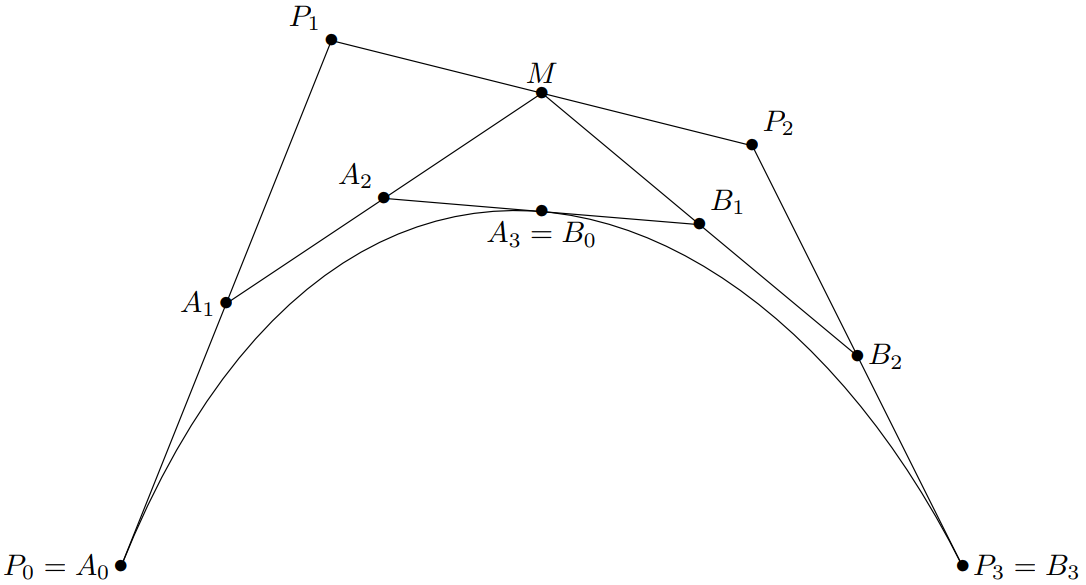

Cette construction est l'algorithme de Casteljau. Remarquez que le point $A_3 = B_0$ appartient à la courbe (il
correspond au point $M(1/2)$)
 et que la ligne brisée formée des deux suites de segments $[A_0, A_1, A_2, A_3]$ et $[B_0, B_1, B_2, B_3]$
est une approximation bien plus précise de la courbe que n'est la ligne brisée formée par les points $[P_0, P_1, P_2, P_3]$. On
peut donc construire récursivement une approximation de la courbe de Bézier : tant que les segments de la ligne brisée
sont de longueur supérieure à une certaine borne, on applique l'algorithme de Casteljau.


!!! question Question 8
Ecrire une fonction `milieu(A: [], B: []) -> []` prenant en entrée deux points et renvoyant le couple de coordonnées associé au milieu du segment $[AB]$.
!!!

In [7]:
def milieu(A,B):
    return [(A[0]+B[0])/2,(A[1]+B[1])/2]

In [8]:
P0 = [0,0]
P1 = [10,10]
milieu(P0,P1)

[5.0, 5.0]

On note `P=[P0,P1,P2,P3]` la liste des pôles de la courbe de Bézier.
!!! question Question 9
En déduire une fonction `etape_casteljau(P)` prenant en entrée une liste de 4 points du plan et retournant deux listes de la forme $[A_0, A_1, A_2, A_3]$ et $[B_0, B_1, B_2, B_3]$ comme détaillé dans l'algorithme de Casteljau.
!!!

In [9]:
def etape_casteljau(P):
    p0, p1, p2, p3=P
    M = milieu(p1, p2)
    a1 = milieu(p0, p1)
    a2 = milieu(a1, M)
    b2 = milieu(p2, p3)
    b1 = milieu(M, b2)
    a3 = milieu(a2, b1)
    return [p0, a1, a2, a3], [a3, b1, b2, p3]

In [10]:
P0,P1,P2,P3 = [0,0],[0,10],[20,10],[20,0]
poly = (P0,P1,P2,P3)
etape_casteljau(poly)

([[0, 0], [0.0, 5.0], [5.0, 7.5], [10.0, 7.5]], [[10.0, 7.5], [15.0, 7.5], [20.0, 5.0], [20, 0]])

!!! question Question 10
Ecrire une fonction `distance(A,B)` permettant de calculer la distance $AB$.
!!!

In [11]:
import math as m
def distance(A,B):
    return m.sqrt((B[0]-A[0])**2+(B[1]-A[1])**2)
P0,P1 = [0,0],[0,10]
distance(P0,P1)

10.0

!!! question Question 11
Ecrire une fonction `cond_arret(P)` qui renvoie `False` si la distance entre 2 points successifs est supérieure à 0.1, `True` sinon.
!!!

In [12]:
def cond_arret(P):
    for i in range(len(P)-1):
        if distance(P[i],P[i+1])>=.1:
            return False
    return True

In [13]:
P0,P1,P2 = [0,0],[0,10],[0,20]
poly1 = (P0,P1,P2)
cond_arret(poly1)

False

!!! question Question 12
En déduire une fonction (récursive) `bezier_casteljau(P)` prenant en entrée une liste de 4 points du plan et traçant une approximation de la courbe de Bézier contrôlée par les
points de $P$. Lorsqu'on se trouvera dans le cas de la condition d'arrêt définie par `cond_arret(P)`, on tracera la ligne brisée constituée des points de
$P$ en utilisant la fonction `trace_ligne_brisee(P)` (non demandée).
!!!

In [14]:
def trace_ligne_brisee(P):
    les_x = [p[0] for p in P]
    les_y = [p[1] for p in P]
    plt.plot(les_x,les_y)

In [15]:
def bezier_casteljau(P):
    P = [np.array(x) for x in P]
    if cond_arret(P):
        trace_ligne_brisee(P)
    else:
        a,b = etape_casteljau(P)
        bezier_casteljau(a)
        bezier_casteljau(b)

In [16]:
import matplotlib.pyplot as plt 
import numpy as np

In [17]:
plt.close()
bezier_casteljau(poly)
plt.grid()
plt.axis("equal")
plt.show()

In [18]:
import _DS_02 as t
try : 
    factorielle
except :
    factorielle = None

try : 
    binomial
except :
    binomial = None
    
try : 
    binomial_rec
except :
    binomial_rec = None

try : 
    bernstein
except :
    bernstein = None

try : 
    calcule_t
except :
    calcule_t = None

try : 
    calcule_M
except :
    calcule_M = None
    
try : 
    milieu
except :
    milieu = None
    
try : 
    etape_casteljau
except :
    etape_casteljau = None
    
try : 
    distance
except :
    distance = None

try : 
    cond_arret
except :
    cond_arret = None

In [19]:
t.go(factorielle,
    binomial,
    binomial_rec,
    bernstein,
    calcule_t,
    calcule_M,
    milieu,
    etape_casteljau,
    distance,
    cond_arret)

Question 1 :  2.0 / 2.0
Question 2 :  2.0 / 2.0
Question 3 :  2.0 / 2.0
Question 4 :  2.0 / 2.0
Question 5 :  2.0 / 2.0
Question 6 :  2.0 / 2.0
Question 8 :  2.0 / 2.0
Question 9 :  2.0 / 2.0
Question 10 :  2.0 / 2.0
Question 11 :  2.0 / 2.0
20.0 20.0
20.0 20
